In [ ]:
!pip install torch==1.10.1+cu102 torchvision==0.11.2+cu102 torchaudio===0.10.1+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html


In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [ ]:
# transformers for actual nlp model - to make use of bert model
#request -  to make a request to the website we scrape
#beautifulsoup4 - actually work through that soup that we actually get returned from the page and extract the data that we actually need
# mido - sheet trymido.io

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
tokenize = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
tokens = tokenize.encode('Its Great my dear, Its Great', return_tensors = 'pt')

In [ ]:
tokens[0]

tensor([  101, 10491, 11838, 11153, 42958,   117, 10491, 11838,   102])

In [ ]:
tokenize.decode(tokens[0])

'[CLS] its great my dear, its great [SEP]'

In [ ]:
result = model(tokens)

In [ ]:
result

SequenceClassifierOutput([('logits',
                           tensor([[-2.2412, -2.0823, -0.3531,  1.4185,  2.7819]],
                                  grad_fn=<AddmmBackward0>))])

In [ ]:
torch.argmax(result.logits)

tensor(4)

In [ ]:
int(torch.argmax(result.logits))

4

In [ ]:
# it has 0 to 5 scale of sentiment

In [ ]:
result.logits

tensor([[-2.2412, -2.0823, -0.3531,  1.4185,  2.7819]],
       grad_fn=<AddmmBackward0>)

#Extract the data

In [ ]:
r = requests.get('https://www.yelp.com/biz/annapoorna-authentic-indian-cuisine-milpitas-4?osq=Annapoorna')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p',{'class':regex})
reviews = [result.text for result in results]

In [ ]:
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b05852393ae5/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script async src="https://www.google-analytics.com/ana

In [ ]:
reviews

["There is something which is universally loved and you are the part of that crowd and then there is something that connects you to the roots. This place is one of few authentic places serving maharashtrian food in the Bay Area. It is home away from home!Top ones loved by maharashtrian better half:1. Yogurt served with Sabudana vada: it has perfect part ginger and chilies and sweetness. Vada itself is pretty good. 2. Thecha - another small side item serverd with bhakari items. 3. Jowar bhakari - it's delicious and wish they sever bajari + ragi bhakari for winter months4. Kokam sharbat - all time favorite (it's the best source of c vitamin)5. Kothimbir vadi - another favored fingerfood perfect for parties. Other items loved by all of us1. Bombay grilled cheese sandwich - tip : if you can have it there instead of to go to avoid soggy mess2. Sevpuri sandwich - loved since childhood happy to see it served thousands of miles away from favorite chaat places back in Mumbai3. Vada paav and she

In [ ]:
results[0].text

"There is something which is universally loved and you are the part of that crowd and then there is something that connects you to the roots. This place is one of few authentic places serving maharashtrian food in the Bay Area. It is home away from home!Top ones loved by maharashtrian better half:1. Yogurt served with Sabudana vada: it has perfect part ginger and chilies and sweetness. Vada itself is pretty good. 2. Thecha - another small side item serverd with bhakari items. 3. Jowar bhakari - it's delicious and wish they sever bajari + ragi bhakari for winter months4. Kokam sharbat - all time favorite (it's the best source of c vitamin)5. Kothimbir vadi - another favored fingerfood perfect for parties. Other items loved by all of us1. Bombay grilled cheese sandwich - tip : if you can have it there instead of to go to avoid soggy mess2. Sevpuri sandwich - loved since childhood happy to see it served thousands of miles away from favorite chaat places back in Mumbai3. Vada paav and shez

In [ ]:
len(reviews)

11

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame(np.array(reviews), columns = ['reviews'])

In [ ]:
df.head(3)

,reviews
0,There is something which is universally loved ...
1,"Used to be one of our favorite restaurant, but..."
2,The place used to be our to go (even in the pr...


In [ ]:
df.shape

(11, 1)

In [ ]:
df['reviews'].iloc[::3]

0    There is something which is universally loved ...
3    I have always like their wraps/frankie's ! The...
6    Ok, this review is more for the experience tha...
9    Annapoorna was recommended to me by a colleagu...
Name: reviews, dtype: object

In [ ]:
def sentiment_values(review):
  
  tokens = tokenize.encode(review, return_tensors = 'pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))+1



In [ ]:
sentiment_values(df['reviews'].iloc[0])

5

In [ ]:
df['sentiment_value'] = df['reviews'].apply(lambda x: sentiment_values(x))

In [ ]:
df.head(3)

,reviews,sentiment_value
0,There is something which is universally loved ...,5
1,"Used to be one of our favorite restaurant, but...",2
2,The place used to be our to go (even in the pr...,2


In [ ]:
df['sentiment_value']

0     5
1     2
2     2
3     4
4     2
5     5
6     3
7     5
8     4
9     4
10    5
Name: sentiment_value, dtype: int64

In [ ]:
df

,reviews,sentiment_value
0,There is something which is universally loved ...,5
1,"Used to be one of our favorite restaurant, but...",2
2,The place used to be our to go (even in the pr...,2
3,I have always like their wraps/frankie's ! The...,4
4,We had a bad experience here. Dahi puri here w...,2
5,This place came highly recommended and it sure...,5
6,"Ok, this review is more for the experience tha...",3
7,Authentic Maharashtrian Food! I hadn't had shr...,5
8,This is the time I tried Maharashtrian cuisine...,4
9,Annapoorna was recommended to me by a colleagu...,4


In [ ]:
df['reviews'][1]

'Used to be one of our favorite restaurant, but lately the quality for Pav-Bhaji, Misal, Veg. Kolhapuri and Bombay Frankie have been average. It had too much oil and the taste was kind of on and off. To top it off the rates have been increased on similar lines to premium restaurants.Puran-Poli & Swaraj has been now our go-to place for Maharashtrian cuisine.Sorry Annapoorna, you have lost one of your regular customer. After you have moved quality standards have gone down drastically.'

In [ ]:
def sentiment_analysis (score):
  if (score > 3):
    return "Positive"
  elif (score) < 3:
    return "Negative"
  else:
    return "Neutral"

In [ ]:
sentiment_analysis(df['sentiment_value'].iloc[1])

'Negative'

In [ ]:
df['sentiments'] = df['sentiment_value'].apply(lambda x: sentiment_analysis(x))

In [ ]:
df

,reviews,sentiment_value,sentiments
0,There is something which is universally loved ...,5,Positive
1,"Used to be one of our favorite restaurant, but...",2,Negative
2,The place used to be our to go (even in the pr...,2,Negative
3,I have always like their wraps/frankie's ! The...,4,Positive
4,We had a bad experience here. Dahi puri here w...,2,Negative
5,This place came highly recommended and it sure...,5,Positive
6,"Ok, this review is more for the experience tha...",3,Neutral
7,Authentic Maharashtrian Food! I hadn't had shr...,5,Positive
8,This is the time I tried Maharashtrian cuisine...,4,Positive
9,Annapoorna was recommended to me by a colleagu...,4,Positive


In [50]:
import seaborn as sns


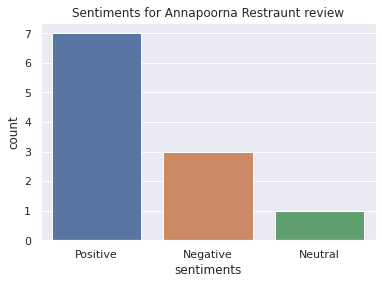

In [52]:
sns.countplot(data = df, x = 'sentiments').set(title = "Sentiments for Annapoorna Restraunt review")
sns.set_theme(style="darkgrid")